In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\이민규\Desktop\ai_class_git\week2\titanic.csv", index_col=0)

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Sex')

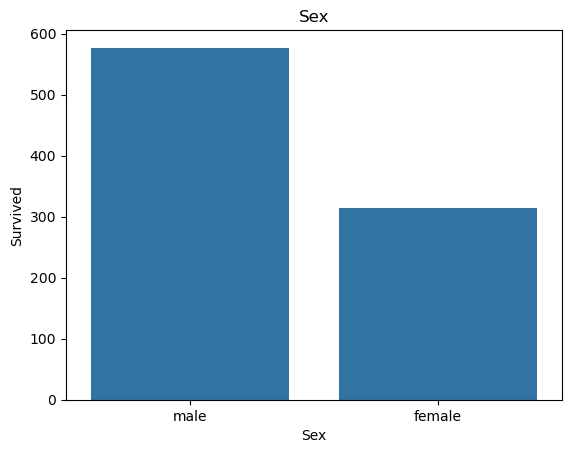

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Sex")

In [7]:
# 결측치 확인
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
columns_to_delete = ['Name', 'Ticket', 'Cabin']
df = df.drop(columns_to_delete, axis=1) # axis 1은 열, 0은 행
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [9]:
mean_age = df['Age'].mean() # 결측치를 제외한 모든 age값의 평균값
df['Age'] = df['Age'].fillna(mean_age) # 계산된 평균값을 결측치Nan에 집어넣은 후 df에 재할당
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
label_encoder = LabelEncoder() # LabelEncoder 초기화
columns_to_encode = ['Sex', 'Embarked'] # 특정 컬럼만 인코딩
for column in columns_to_encode:
    df.loc[:, column] = label_encoder.fit_transform(df[column])
print(df)

             Survived  Pclass Sex        Age  SibSp  Parch     Fare Embarked
PassengerId                                                                 
1                   0       3   1  22.000000      1      0   7.2500        2
2                   1       1   0  38.000000      1      0  71.2833        0
3                   1       3   0  26.000000      0      0   7.9250        2
4                   1       1   0  35.000000      1      0  53.1000        2
5                   0       3   1  35.000000      0      0   8.0500        2
...               ...     ...  ..        ...    ...    ...      ...      ...
887                 0       2   1  27.000000      0      0  13.0000        2
888                 1       1   0  19.000000      0      0  30.0000        2
889                 0       3   0  29.699118      1      2  23.4500        2
890                 1       1   1  26.000000      0      0  30.0000        0
891                 0       3   1  32.000000      0      0   7.7500        1

In [12]:
X = df.drop('Survived', axis=1)
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [13]:
y=df['Survived']
y.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_scaled, y_train)

pred_svm = clf_svm.predict(X_test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8146067415730337
[[92 17]
 [16 53]]


In [16]:
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_lr.fit(X_train_scaled, y_train)

pred_lr = clf_lr.predict(X_test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7752808988764045
[[85 24]
 [16 53]]


In [17]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7471910112359551
[[80 29]
 [16 53]]


In [18]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7696629213483146
[[86 23]
 [18 51]]


In [19]:
print("\n--- KNN Classifier ---")
# KNN 모델 생성 (기본적으로 이웃의 수는 5로 설정)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)  # 훈련 데이터로 모델 학습
# 테스트 데이터에 대해 예측 수행
pred_knn = knn_clf.predict(X_test)

# 모델 평가: 정확도와 혼동행렬 출력
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- KNN Classifier ---
0.7078651685393258
[[90 19]
 [33 36]]
